# P-values and the Central Limit Theorem

## The explanation

Following up on the ASA's statement on p-values, I wanted to dig more into significance testing and p-values, and what they can do for researchers/analysts and what they can't. Though before we talk about significance testing and p-values, let's take a slight detour for this post and discuss the Central Limit Theorem (CLT). Why? Because calculating critical values for a significance/confidence level and p-values -- which are both key components of significance testing -- require that one knows what the sampling distribution of the relevant test statistic looks like. In a sizeable number of cases, the CLT tells us what the sampling distribution looks like. 

First things first, what's a sampling distribution? Imagine that one tosses a coin 20 times, observes how many times the coin comes up head and how many times it comes up tails, and then calculates the average of those tosses. Repeat that over and over again. After tossing the coin, collecting the observations and calculating average of the tosses a very large number of times, one will then have a very large number of sample averages. The distribution of those sample averages is called a sampling distribution of the average. Generally, if one collects a sample from some distribution and calculates a statistic based upon that sample, then repeats that process over and over, a sampling distribution for that statistic will be generated.

What does the CLT state about sampling distributions? The CLT states that if one repeatedly draws a large enough sample from some distribution and calculates the mean of each sample, the distribution of those means will approximately be a Normal distribution. It doesn't matter what distribution one is sampling from. By the way, the CLT also applies to the sampling distribution of sums as well. 

This is an amazingly useful result since more often than not one has no idea how the data one collects is distributed, but by invoking the CLT one can know how the mean of a sample is distributed and the mean is likely what one is most interested in. For example, when a drug is being tested, the average effect of the drug is what the researcher is attempting to determine, not the effect on an individual. The researcher cares less about the idiosyncratic effect of the drug on an individual; he is trying to determine the effect that the drug would generally have on the population of sick.   

## The demonstration

Alright enough talk, let's draw some pictures. To demonstrate the CLT in action, let's calculate the averages of samples drawn from a distribution that is very much unlike a Normal distribution and see if the sampling distribution of the average converges to a Normal distribution as sample size increases. We will generate a sampling distribution of a mean by drawing samples from a Beta distribution and calculating the average of each of those samples. I chose a Beta distribution since it looks extremely different from a Normal distribution and shows the power of the CLT.

In [1]:
%matplotlib inline

In [2]:
#import all the libraries necessary for the calculations.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels as sm

Here's what a Beta distribution looks like. Notice that it looks nothing like the typical bell curve, normal distribution. 

In [3]:
#set beta distribution parameters
true_a = .5
true_b = .5

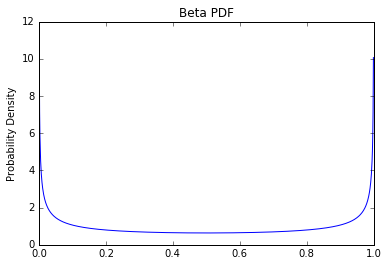

In [4]:
#plot the Beta probability density function
x = np.linspace(0, 1, 1000)
beta_pdf = sp.stats.beta.pdf(x, a=true_a, b=true_b)
plt.plot(x, beta_pdf)
plt.title('Beta PDF')
plt.ylabel('Probability Density')

Despite the fact the Beta distribution looks very different from a Normal distribution, the CLT states that if one repeatedly draws sufficiently large samples from this distribution and calculates an average for every sample drawn, then the sample averages will follow a Normal distribution. 

So how do we check if the CLT holds?
1. Set a sample size
2. Draw a sample of the size set in step 1 from the Beta distribution
3. Calculate the average the sample drawn in step 2, and save it
4. Repeat steps 2 and 3 a very large number of times 
5. Plot the sample averages calculated in steps 2 through 4. 

If the CLT holds, the plot from step 5 should strongly resemble a Normal distribution; if the plot doesn't resemble a Normal distribution, then the CLT doesn't hold.

In [5]:
#draw samples from beta
n_trials = 500
sample_sizes = [1, 5, 25, 100] 

beta_results = []
for size_idx in range(len(sample_sizes)):  
    trial_results = []
    
    for trial in range(n_trials):
        sample = sp.stats.beta.rvs(a=true_a, b=true_b, size=sample_sizes[size_idx])
        average_of_trial = np.mean(sample)
        trial_results.append(average_of_trial)
        
    beta_results.append(trial_results)

Let's see if the CLT holds. Below are the histograms for the sample averages for a variety of sample sizes. To generate these histograms, I have the five steps listed above. Notice that sample size increases from left to right and from top to bottom. The plot in the top, left corner looks essentially like the original Beta distribution shown above, and that makes sense since the sample size is one. As sample size increases to 5 and above, the distribution looks more and more like a Normal. 

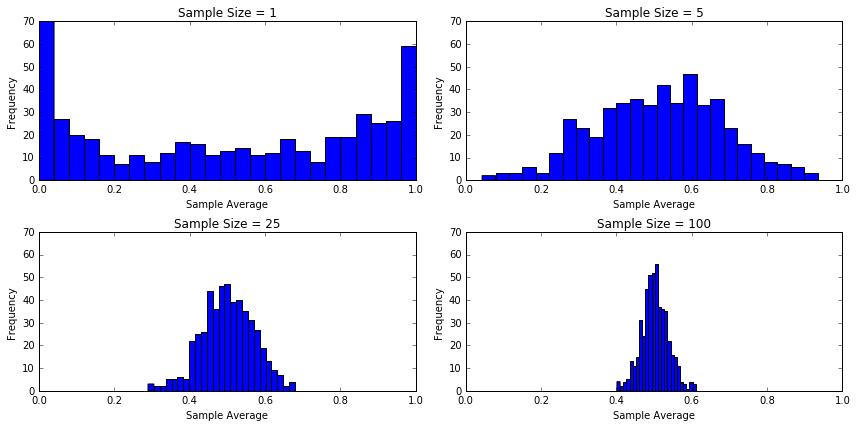

In [6]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(12)

sample_idx = 0
for i in range(2):
    for j in range(2):

        #plot curves
        axes[i, j].hist(beta_results[sample_idx], bins=25)
        axes[i, j].set_title('Sample Size = {}'.format(str(sample_sizes[sample_idx])))
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].set_xlabel('Sample Average')
        axes[i, j].set_xlim([0, 1])
        axes[i, j].set_ylim([0, 70])
        
        sample_idx += 1

plt.tight_layout() 

These histograms look more and more like a Normal as sample size increases, but the question is, how close is the distribution of the sample average to an actual Normal distribution? The answer to this question is easier to visualize by plotting cumulative distribution functions (CDFs) instead of histograms. Recall that a CDF tells one the probability of drawing a value less than or equal to some value x from a probability distribution.

The blue curve in the top, left plot is the CDF of the Beta. This is because the sample size is one. Despite the fact that the original Beta CDF looks quite different from a Normal CDF, the CDF of the sampling distribution of the averages converges fairly quickly to Normal CDF. That is, the blue curve pretty closely matches the green one by the time the sample size reaches 25.

In [7]:
#find the mean and variance of the original Beta distribution.
true_mean = true_a/(true_a + true_b)
true_var = (true_a * true_b)/((true_a + true_b)**2 * (true_a + true_b + 1))

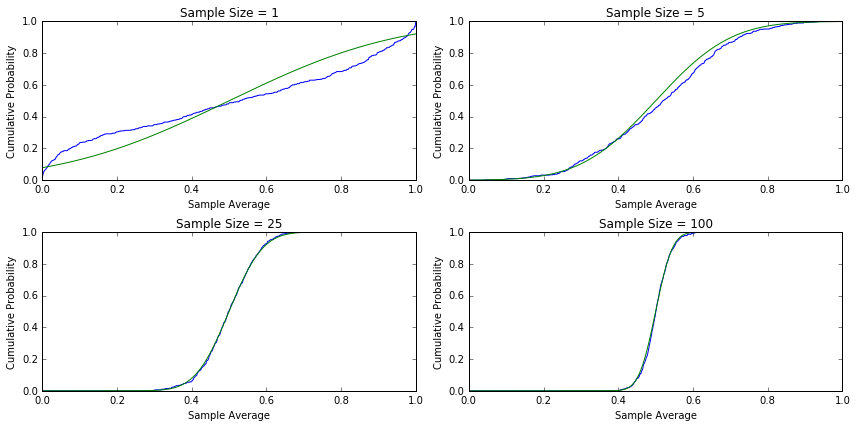

In [8]:
#plot the CDFs of the sampling distribution and of the target normal distribution.
fig, axes = plt.subplots(2,2)
fig.set_figheight(6)
fig.set_figwidth(12)

x = np.linspace(0, 1, 1000)

sample_idx = 0
for i in range(2):
    for j in range(2):
        
        #generate cdf curves
        norm_cdf = sp.stats.norm.cdf(x, loc=true_mean, scale=(true_var/sample_sizes[sample_idx])**(.5))
        beta_cdf = sm.tools.tools.ECDF(beta_results[sample_idx])

        #plot curves
        axes[i, j].plot(x, beta_cdf(x), x, norm_cdf)
        axes[i, j].set_title('Sample Size = {}'.format(str(sample_sizes[sample_idx])))
        axes[i, j].set_ylabel('Cumulative Probability')
        axes[i, j].set_xlabel('Sample Average')
        
        sample_idx += 1

plt.tight_layout() 

And that's the CLT. So much of the statistics we use every day is built on top of it. When someone claims that some data is distributed Normally, it's probably based on an appeal to the CLT. And remember that the CLT tells us how sample averages and sums are distributed. It doesn't tell us how the original data is distributed.